<a href="https://colab.research.google.com/github/UBela/BV-ML-CV-Praktikum/blob/main/yolo_model_license_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [1]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

In [2]:
HOME = os.getcwd()
print(HOME)

/content


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ROOT_DIR = '/content/drive/MyDrive/license_plate_recognition/yolo_model_data'

In [5]:
model = YOLO(f"{HOME}/yolov8s.pt")

In [20]:
results = model.train(data=os.path.join(ROOT_DIR, 'license_plates.yaml'), epochs=50)

Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8s.pt, data=/content/drive/MyDrive/license_plate_recognition/yolo_model_data/license_plates.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

In [21]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [22]:
!ls {HOME}/runs/detect/train4/


args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1687011066.c9eb6829fb4d.369.1  train_batch2.jpg
F1_curve.png					   val_batch0_labels.jpg
labels_correlogram.jpg				   val_batch0_pred.jpg
labels.jpg					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


In [7]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/license_plate_recognition/train4/results.png', width=600)

/content


FileNotFoundError: ignored

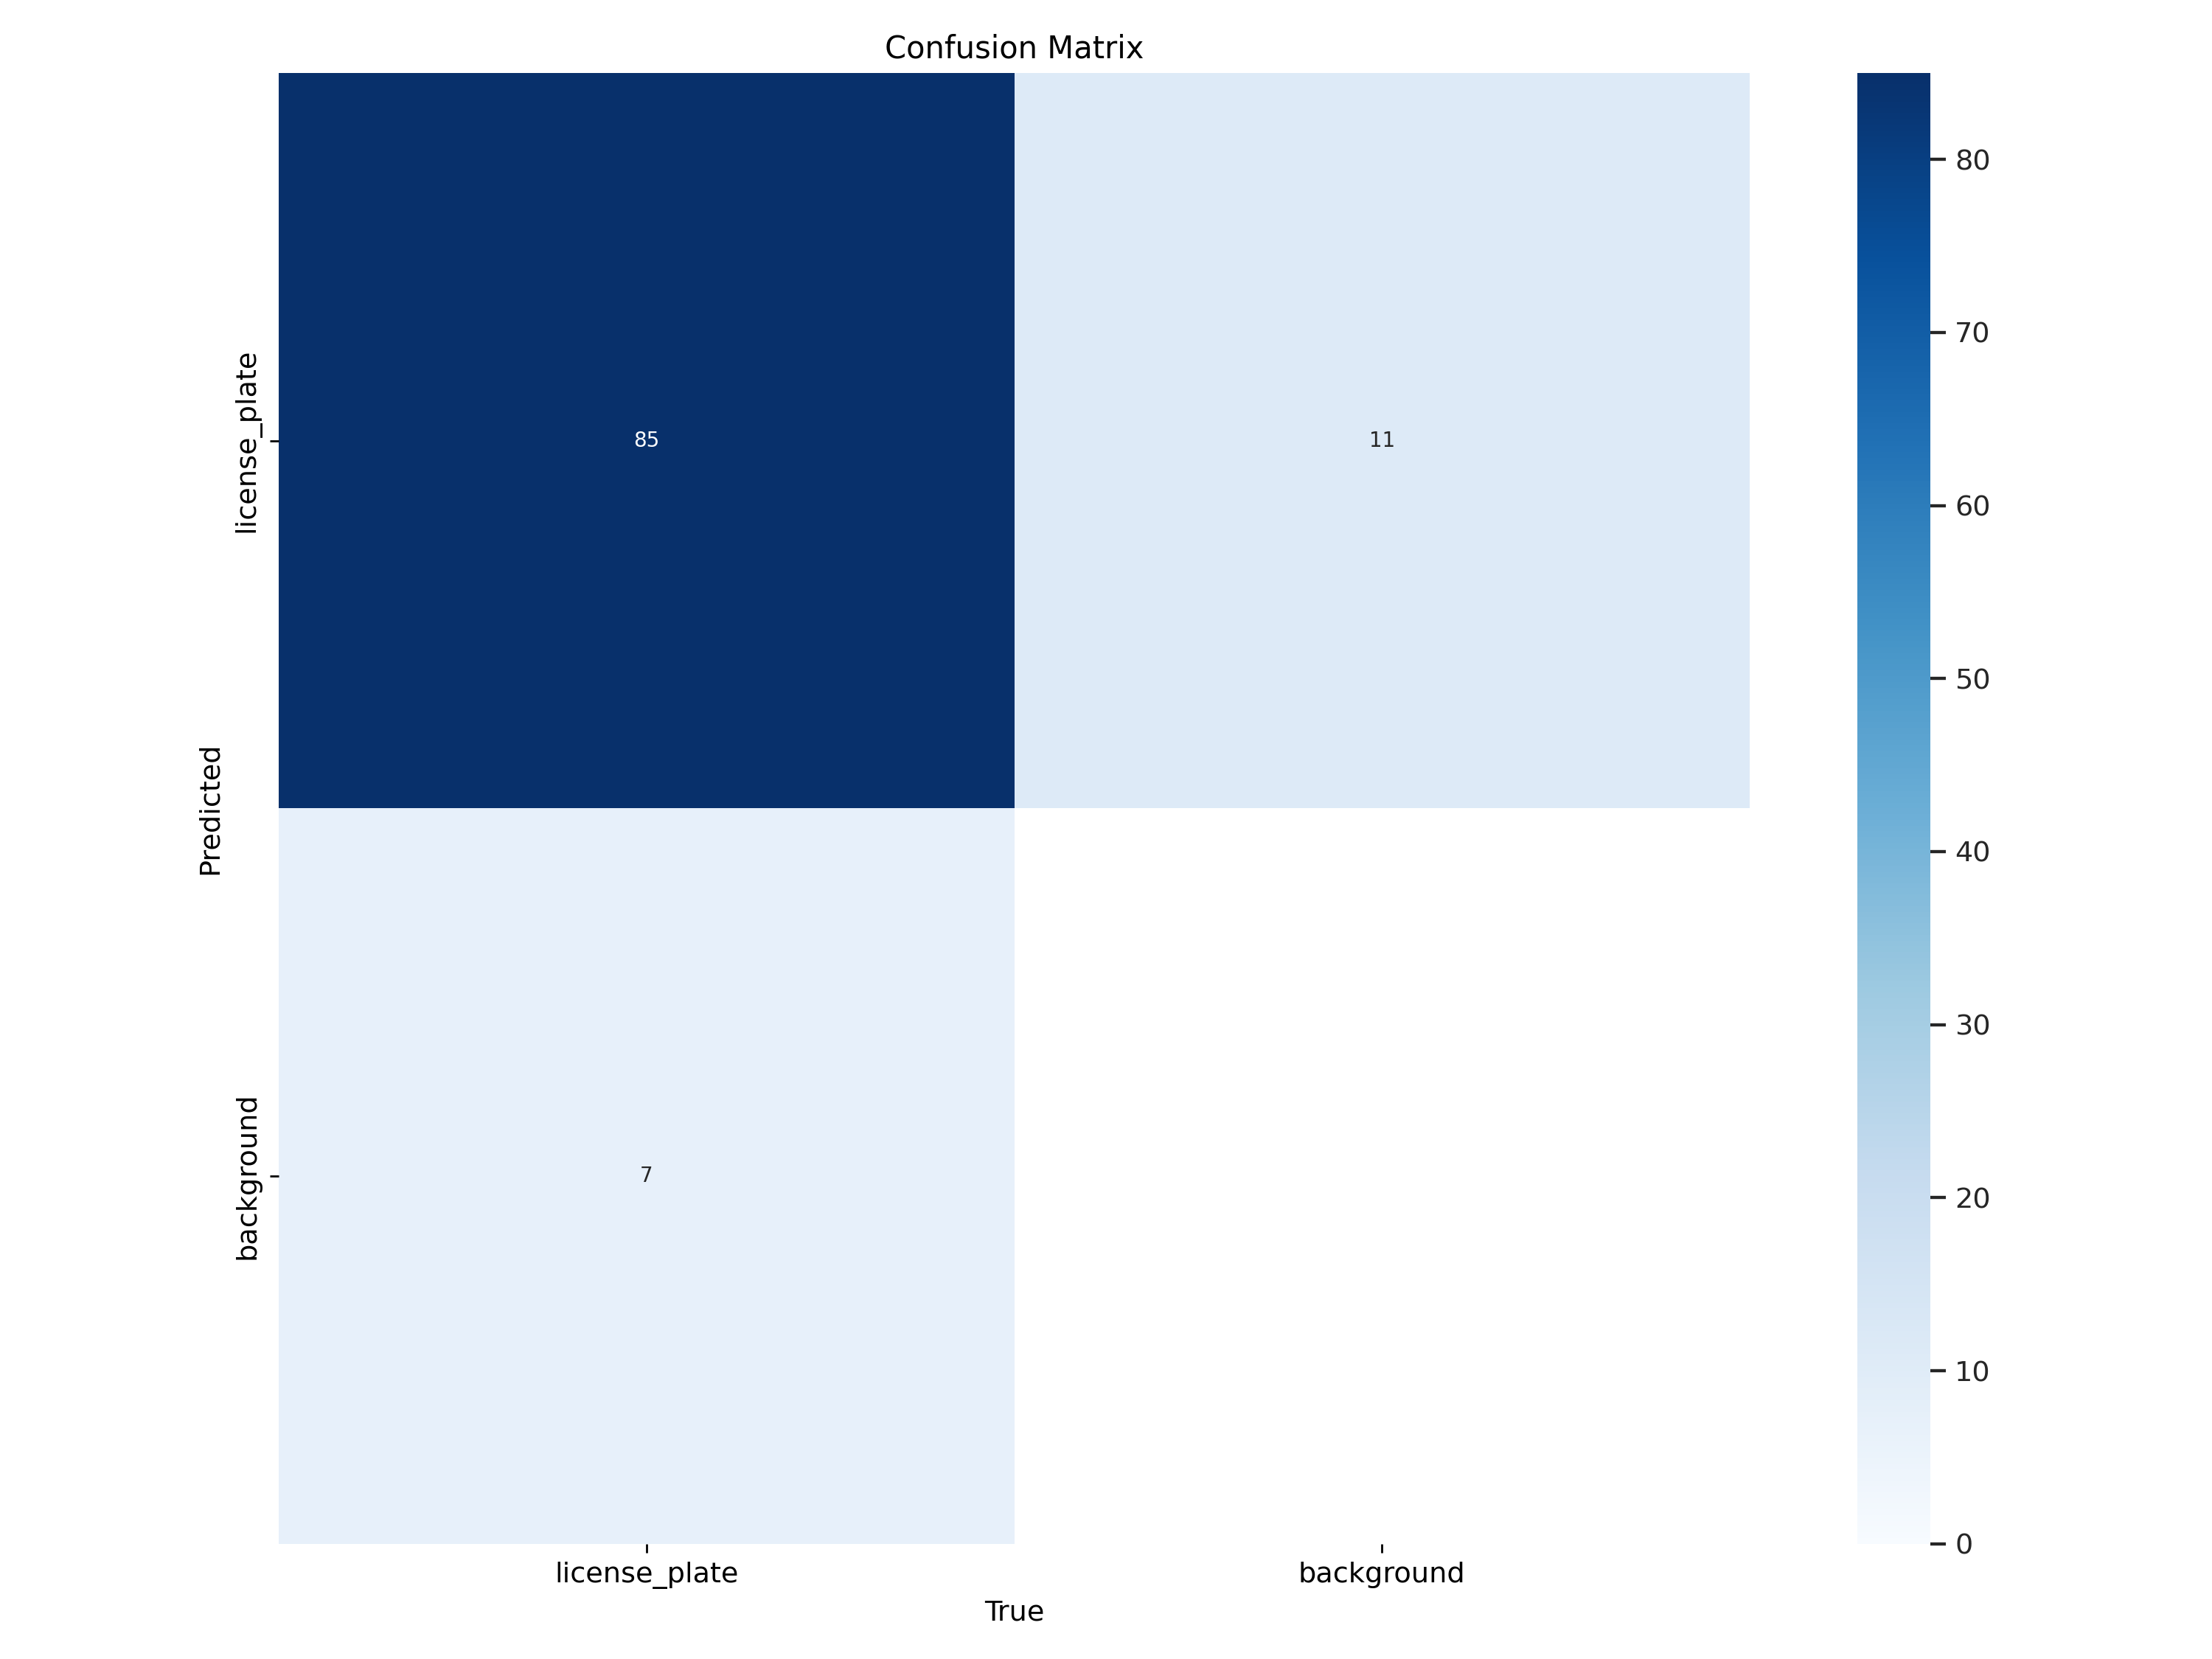

In [32]:
Image(filename='/content/drive/MyDrive/license_plate_recognition/train4/confusion_matrix.png', width=600)

In [38]:
best_weights = '/content/runs/detect/train4/weights/best.pt'

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/drive/MyDrive/license_plate_recognition/yolo_model_data/license_plates.yaml

Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/license_plate_recognition/yolo_model_data/labels/test.cache... 87 images, 0 backgrounds, 0 corrupt: 100% 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.09s/it]
                   all         87         92      0.932      0.902      0.938      0.624
Speed: 7.4ms preprocess, 35.7ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val2


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/license_plate_recognition/TestImagesSet1 save=True

Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/bitch-car-number-plate-on-german-car-ANA6NC.jpg: 480x640 1 license_plate, 60.6ms
image 2/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/image_1.jpg: 480x640 (no detections), 13.1ms
image 3/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/image_2.jpg: 480x640 (no detections), 13.1ms
image 4/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/image_3.jpg: 480x640 (no detections), 13.1ms
image 5/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/image_4.jpg: 480x640 (no detections), 13.1ms
image 6/6 /content/drive/MyDrive/license_plate_recognition/TestImagesSet1/image_5.jpg: 480x640 (no detections), 13.0ms
Speed: 2.9ms preprocess, 21.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 6